<a href="https://colab.research.google.com/github/lucianoribeirogyn/colby_abacus/blob/main/abaco1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Esse script serve para
#1) Ler os pontos do abaco 01 gerados a partir do aplicativo Web Plot Digitizer 4.6,
#2) Encontrar a equação da curva 
#3) Redesenhar o gráfico com a equação encontrada

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [4]:
arquivo_dados = pd.read_csv('abacus01.csv', sep = ';')

In [22]:
#axis x
velocidade = pd.Series(arquivo_dados.iloc[:,0]).tolist()

#axis y
qnm = pd.Series(arquivo_dados.iloc[:,1]).tolist()

# Given log values of x , y as input
curve = np.polyfit(np.log10(velocidade), np.log10(qnm), 1)

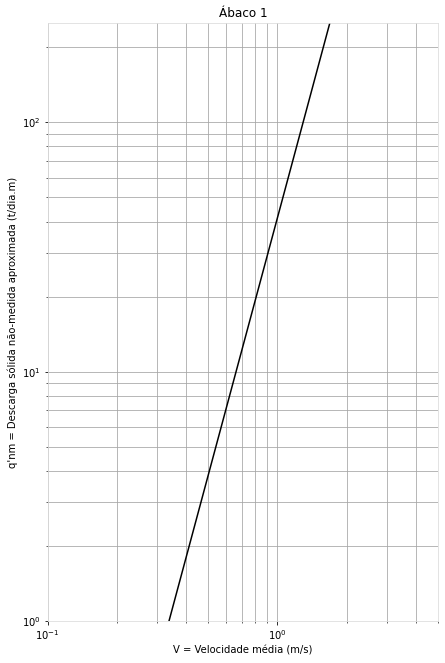

In [25]:
#esse script serve para desenhar o abaco 01 baseado nos pontos que foram gerados a partir da equaçao acima

velocidade = list()
qnm = list()

#Log qnm = 3,42840252logV+1,61689272 (python)
for x in np.arange(0.1, 5.1, 0.1):
    velocidade.append(x)
    qnm.append(pow(10, curve[0]*math.log10(x)+curve[1]))

# Display grid
plt.figure(figsize=[7, 11])

ax = plt.axes()
ax.set_facecolor("white")

ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

# Linear X axis, Logarithmic Y axis
plt.semilogy(velocidade, qnm, color='k')
plt.ylim([1,250])
plt.xlim([0.1,5])

# Provide the title for the semilog plt
plt.title('Ábaco 1')
# Give x axis label for the semilog plt
plt.xlabel('V = Velocidade média (m/s)')
# Give y axis label for the semilog plt
plt.ylabel("q'nm = Descarga sólida não-medida aproximada (t/dia.m)")
# Display the semilog plt

plt.loglog(velocidade)
plt.grid(True, which="both", ls="-", color='0.65', axis='both')
plt.savefig('abaco1.png')
plt.show()